# Import dependencies

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Draw the Irises Dataset

In [3]:
dataset = pd.read_csv("data/IRIS.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x_data = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
x_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y_data = dataset["species"]
y_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [6]:
sc = StandardScaler()
x_data = sc.fit_transform(x_data)

# warning DataFrame was converted to np.array
x_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [16]:
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data)

In [17]:
pca = PCA(n_components=2)
x_trans_data = pca.fit_transform(x_data)

print(f"Explained Variance ratio: {pca.explained_variance_ratio_}")
print(f"Explained Variance      : {pca.explained_variance_}")

Explained Variance ratio: [0.72770452 0.23030523]
Explained Variance      : [2.93035378 0.92740362]


In [18]:
x_names = dataset.columns.tolist()[:-1]
print(x_names)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


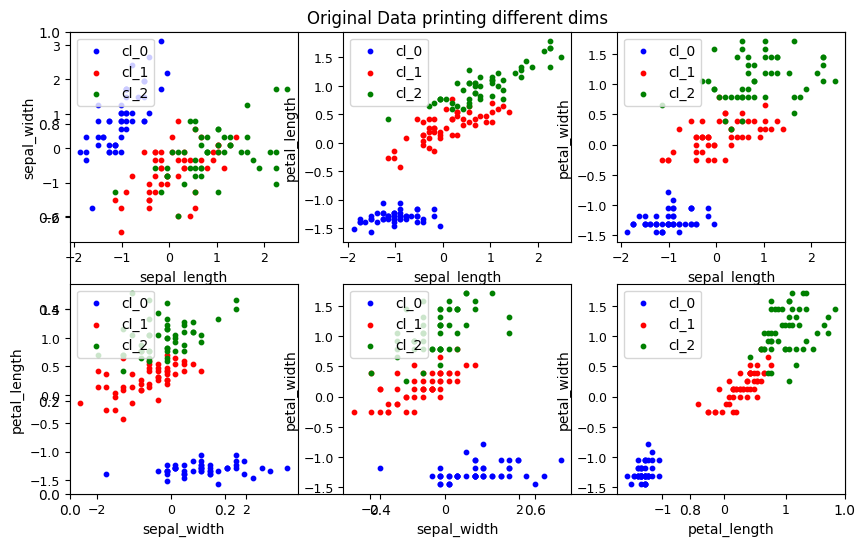

In [19]:
count_clusters = 3

mat_axis = [
    (0, 1),
    (0, 2),
    (0, 3),
    (1, 2),
    (1, 3),
    (2, 3)
]


def draw_clusters(c_clusters, pten_cluster_entries, x_label_name, y_label_name, obj_ax, plot_number):
    obj_ax.subplot(2, 3, plot_number)
    for cl_inx in range(c_clusters):
        obj_ax.scatter(pten_cluster_entries[cl_inx][0], pten_cluster_entries[cl_inx][1], s=10, c=vec_colors[cl_inx],
                       marker='o', label='cl_' + str(cl_inx))
    obj_ax.legend(loc='upper left')
    obj_ax.xlabel(x_label_name)
    obj_ax.ylabel(y_label_name)
    obj_ax.tick_params(axis='both', which='major', labelsize=9)


plt.figure(figsize=(10, 6))
plt.title('Original Data printing different dims')

for i in range(len(mat_axis)):
    pten_cluster_entries_1 = []
    for cl in range(count_clusters):
        pvec_cluster_entries_axis_0 = []
        pvec_cluster_entries_axis_1 = []
        for en in range(len(x_data)):
            if cl == y_data[en]:
                pvec_cluster_entries_axis_0.append(x_data[en][mat_axis[i][0]])
                pvec_cluster_entries_axis_1.append(x_data[en][mat_axis[i][1]])
        pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

    draw_clusters(count_clusters, pten_cluster_entries_1,
                  x_names[mat_axis[i][0]], x_names[mat_axis[i][1]],
                  plt, i + 1)

plt.show()

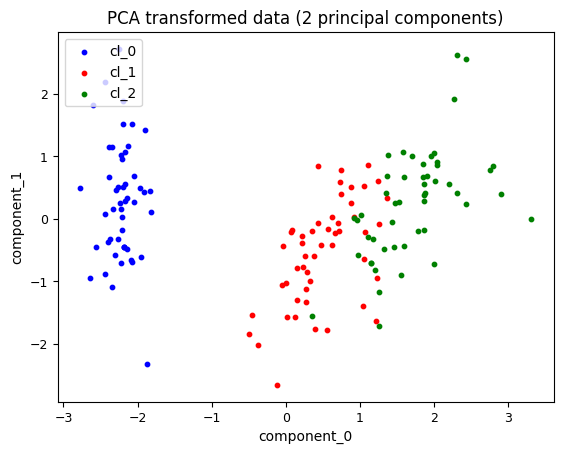

In [20]:
plt.title('PCA transformed data (2 principal components)')
count_clusters = 3
vec_colors = ['blue', 'red', 'green', 'orange', 'lime', 'purple',
              'aqua', 'navy', 'coral', 'teal', 'mustard', 'black',
              'maroon', 'yellow', 'pink']

pten_cluster_entries_1 = []
for cl in range(count_clusters):
    pvec_cluster_entries_axis_0 = []
    pvec_cluster_entries_axis_1 = []
    for en in range(len(x_trans_data)):
        if cl == y_data[en]:
            pvec_cluster_entries_axis_0.append(x_trans_data[en][0])
            pvec_cluster_entries_axis_1.append(x_trans_data[en][1])
    pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

for cl_inx in range(count_clusters):
        plt.scatter(pten_cluster_entries_1[cl_inx][0], pten_cluster_entries_1[cl_inx][1], s=10, c=vec_colors[cl_inx],
                       marker='o', label='cl_' + str(cl_inx))
plt.legend(loc='upper left')
plt.xlabel("component_0")
plt.ylabel("component_1")
plt.tick_params(axis='both', which='major', labelsize=9)

plt.show()

# Prepare data

In [21]:
# Load the data from file

dataset = pd.read_csv("./data/IRIS.csv")
x_data = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [22]:
print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")

x_data MEAN:
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

x_data STD:
sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64


In [23]:
# Normalize the data

x_data -= x_data.mean(axis=0)
x_data /= x_data.std(axis=0)

In [24]:
print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")

x_data MEAN:
sepal_length   -5.210647e-16
sepal_width    -6.631732e-16
petal_length    1.894781e-16
petal_width    -1.894781e-16
dtype: float64

x_data STD:
sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64


In [26]:
# Onehot encode labels

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False)

labels = dataset["species"]
coded_labels = label_encoder.fit_transform(labels)
y_data = onehot_encoder.fit_transform(coded_labels.reshape(-1, 1))

print(y_data)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [27]:
x_data = x_data.to_numpy()

In [28]:
# Shuffle the data

np.random.seed(seed=42)
perm = np.random.permutation(len(x_data))
x_data = x_data[perm]
y_data = y_data[perm]

In [29]:
# Train / Test split the data

train_count = int(len(x_data) * 0.8)

x_train = x_data[:train_count]
y_train = y_data[:train_count]

x_test = x_data[train_count:]
y_test = y_data[train_count:]

In [30]:
print(x_train[0])
print(y_train[0])

[ 0.30995914 -0.58580104  0.53350852  0.00174712]
[0. 1. 0.]


# Define Model

In [31]:
# Define the ReLU activation function
def relu(x):
    return np.maximum(x, 0)


# Define the softmax activation function
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)


# Define a neural network with one hidden layer
class NeuralNetwork:
    def __init__(self, input_size, hidden_size_0, hidden_size_1, output_size):
        # ReLU 0
        self.W0 = np.random.randn(input_size, hidden_size_0) * 0.01
        self.b0 = np.zeros((1, hidden_size_0))

        # ReLU 1
        self.W1 = np.random.randn(hidden_size_0, hidden_size_1) * 0.01
        self.b1 = np.zeros((1, hidden_size_1))

        # Softmax 2
        self.W2 = np.random.randn(hidden_size_1, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # ReLU 0
        self.Z0 = np.dot(X, self.W0) + self.b0
        self.A0 = relu(self.Z0)

        # ReLU 1
        self.Z1 = np.dot(self.A0, self.W1) + self.b1
        self.A1 = relu(self.Z1)

        # Softmax 2
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward(self, X, y, learning_rate):
        num_examples = X.shape[0]  # basically this is batch size

        dZ2 = self.A2 - y   # this loss function
        dW2 = np.dot(self.A1.T, dZ2) / num_examples
        db2 = np.sum(dZ2, axis=0, keepdims=True) / num_examples
        dA1 = np.dot(dZ2, self.W2.T)

        dZ1 = dA1 * (self.Z1 > 0)
        dW1 = np.dot(self.A0.T, dZ1) / num_examples
        db1 = np.sum(dZ1, axis=0, keepdims=True) / num_examples
        dA0 = np.dot(dZ1, self.W1.T)

        dZ0 = dA0 * (self.Z0 > 0)
        dW0 = np.dot(X.T, dZ0) / num_examples
        db0 = np.sum(dZ0, axis=0, keepdims=True) / num_examples
        
        # this is weight updates
        # this is should be in the independent function
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W0 -= learning_rate * dW0
        self.b0 -= learning_rate * db0

# Useful function

In [32]:
def compute_categorical_cross_entropy_loss(y_true, y_pred):
    """
    Calculate categorical cross-entropy loss.

    Arguments:
    y_true -- true labels (one-hot encoded)
    y_pred -- predicted probability distribution over the classes (softmax output)

    Returns:
    loss -- categorical cross-entropy loss
    """
    # Add a small epsilon value to prevent division by zero
    epsilon = 1e-8

    # Calculate categorical cross-entropy loss
    N = y_true.shape[0]
    loss = -1/N * np.sum(y_true * np.log(y_pred + epsilon))

    return loss

In [33]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of the predicted probabilities relative to the true labels.

    Arguments:
    y_true -- a numpy array of shape (num_examples, num_classes) containing the true labels in one-hot format
    y_pred -- a numpy array of shape (num_examples, num_classes) containing the predicted probabilities

    Returns:
    accuracy -- a scalar representing the fraction of examples that were classified correctly
    """
    # Determine the predicted classes
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Determine the true classes
    y_true_classes = np.argmax(y_true, axis=1)

    # Compute the accuracy
    num_correct = np.sum(y_pred_classes == y_true_classes)
    num_examples = y_true.shape[0]
    accuracy = num_correct / num_examples

    return accuracy

# Training our ANN model

In [34]:
# Create a neural network
nn = NeuralNetwork(4, 6, 4, 3)

# Train the neural network
learning_rate = 0.1
num_epochs = 10_000

val_loss_history = []
val_acc_history = []

train_loss_history = []
train_acc_history = []

for i in tqdm(range(num_epochs)):
    # Perform a forward pass through the network
    y_pred_train = nn.forward(x_train)

    # Compute the loss and accuracy on the training set
    loss_train = compute_categorical_cross_entropy_loss(y_train, y_pred_train)
    acc_train = compute_accuracy(y_train, y_pred_train)

    # Perform a backward pass through the network
    nn.backward(x_train, y_train, learning_rate)

    # Perform a forward pass through the network on the test set
    y_pred_test = nn.forward(x_test)

    # Compute the loss and accuracy on the test set
    loss_test = compute_categorical_cross_entropy_loss(y_test, y_pred_test)
    acc_test = compute_accuracy(y_test, y_pred_test)

    train_loss_history.append(loss_train)
    train_acc_history.append(acc_train)
    val_loss_history.append(loss_test)
    val_acc_history.append(acc_test)

    # Print the loss and accuracy on the training and test sets
    # if i % 100 == 0:
    #     print(f"Epoch {i}: train_loss={loss_train:.4f}, train_acc={acc_train:.4f}, test_loss={loss_test:.4f}, test_acc={acc_test:.4f}")

100%|██████████| 10000/10000 [00:01<00:00, 5195.51it/s]


# Show results

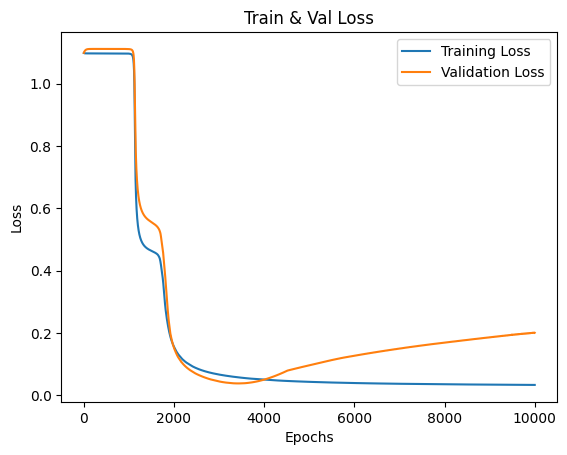

In [35]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss_history) + 1)
plt.plot(epochs, train_loss_history, label="Training Loss")
plt.plot(epochs, val_loss_history, label="Validation Loss")
plt.title("Train & Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

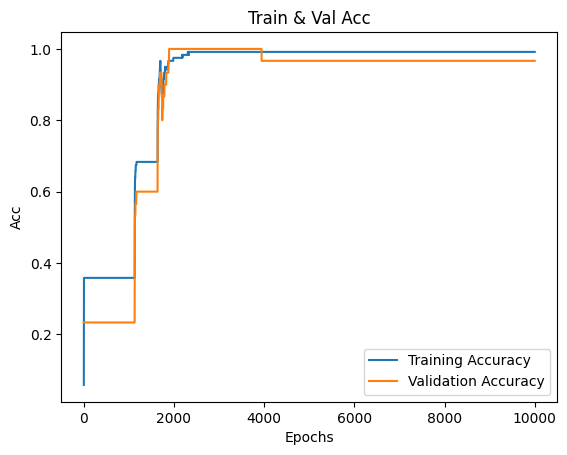

In [36]:
plt.plot(epochs, train_acc_history, label="Training Accuracy")
plt.plot(epochs, val_acc_history, label="Validation Accuracy")
plt.title("Train & Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()